In [1]:
import json
import pandas as pd
import numpy as np
import prettytable as pt
from IPython.display import Image
import os 
import warnings
warnings.filterwarnings("ignore")



###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                #                                                    #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################

directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
yielddatadirectory=directory+"/data/yielddata/yielddata.csv"
voldatadirectory=directory+"/data/volatilitydata/swaptionvolatility.csv"
imagedirectory=directory+"/image"

yielddata = pd.read_csv(yielddatadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 
voldata = pd.read_csv(voldatadirectory)
voldata = voldata.replace(np.nan, '', regex=True) 



In [2]:
swaptionpositiondata = {}
swaptionpositiondata["notional"]=10000000
swaptionpositiondata["valuationDate"]="2021-06-08"
swaptionpositiondata["settlementDate"]="2022-06-08"
swaptionpositiondata["expirationDate"]="2022-06-10"
swaptionpositiondata

{'notional': 10000000,
 'valuationDate': '2021-06-08',
 'settlementDate': '2022-06-08',
 'expirationDate': '2022-06-10'}

In [3]:
optiondefinitiondata = {}
optiondefinitiondata["swapStartDate"]="2022-06-10"
optiondefinitiondata["swapEndDate"]="2027-06-10"
optiondefinitiondata["position"]="Long Receiver"
optiondefinitiondata["currency"]= "USD"
optiondefinitiondata["notificationDays"]= 2
optiondefinitiondata["exerciseType"]= "European"
optiondefinitiondata["paymentType"]= "Physical"
optiondefinitiondata["method"]= "Bachelier"
optiondefinitiondata["volatilityModel"]= "Linear"
optiondefinitiondata["volatilityType"]= "Normal"
optiondefinitiondata["calibrate"]= False
optiondefinitiondata

{'swapStartDate': '2022-06-10',
 'swapEndDate': '2027-06-10',
 'position': 'Long Receiver',
 'currency': 'USD',
 'notificationDays': 2,
 'exerciseType': 'European',
 'paymentType': 'Physical',
 'method': 'Bachelier',
 'volatilityModel': 'Linear',
 'volatilityType': 'Normal',
 'calibrate': False}

In [4]:
#swap fixedleg definition
fixedLeg={}
fixedLeg["payOrReceive"]="Receive"
fixedLeg["coupon"]= 0.012350
fixedLeg["frequency"]="Semiannual"
fixedLeg["dayCounter"]="Thirty360"
fixedLeg["calendar"]= "UnitedStates"
fixedLeg["businessDayConvention"]="ModifiedFollowing"
fixedLeg["maturityDateConvention"]="ModifiedFollowing"
fixedLeg["dateGeneration"]="Backward"
fixedLeg["endOfMonth"]=True
fixedLeg

{'payOrReceive': 'Receive',
 'coupon': 0.01235,
 'frequency': 'Semiannual',
 'dayCounter': 'Thirty360',
 'calendar': 'UnitedStates',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True}

In [5]:
floatingLeg={}
floatingLeg["frequency"]="Quarterly"
floatingLeg["spread"]=0
floatingLeg["dayCounter"]="Actual360"
floatingLeg["calendar"]="UnitedStates"
floatingLeg["businessDayConvention"]="ModifiedFollowing"
floatingLeg["maturityDateConvention"]="ModifiedFollowing"
floatingLeg["dateGeneration"]="Backward"
floatingLeg["endOfMonth"]=True
floatingLeg["fixingDate"]=[]
floatingLeg["fixingRate"]=[]
floatingLeg

{'frequency': 'Quarterly',
 'spread': 0,
 'dayCounter': 'Actual360',
 'calendar': 'UnitedStates',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True,
 'fixingDate': [],
 'fixingRate': []}

In [6]:
instruments={}
depo={}
futures={}
irs={}

depo["businessDayConvention"]="ModifiedFollowing"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                        # if it is null, default value is used

futures["businessDayConvention"]="ModifiedFollowing"  # if it is null, default value is used
futures["dayCounter"]= "Actual360"                    # if it is null, default value is used
futures["market"]="IMM"                               
futures["usedates"]=False                             

irs["businessDayConvention"]="ModifiedFollowing"      # if it is null, default value is used 
irs["dayCounter"]="Thirty360"                         # if it is null, default value is used 
irs["frequency"]="Semiannual"               

instruments["DEPO"]=depo
instruments["FUTURES"]=futures
instruments["IRS"]=irs

instruments

{'DEPO': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Actual360'},
 'FUTURES': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Actual360',
  'market': 'IMM',
  'usedates': False},
 'IRS': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Thirty360',
  'frequency': 'Semiannual'}}

In [7]:
discountCurve={}
discountCurve["settlementDays"]=2  # for calculation
discountCurve["intpMethod"]= "Linear"  # for calculation
discountCurve["currency"]="USD" # Used to filter yielddata by currency
discountCurve["calendar"]="UnitedStates" # for calculation
discountCurve["dayCounter"]="Actual360"  # for calculation
discountCurve["period"]="3M"  # Used to filter yielddata by period
discountCurve["instruments"]=instruments # Select depo,futures and irs data to calculate 
discountCurve

{'settlementDays': 2,
 'intpMethod': 'Linear',
 'currency': 'USD',
 'calendar': 'UnitedStates',
 'dayCounter': 'Actual360',
 'period': '3M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'},
  'FUTURES': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360',
   'market': 'IMM',
   'usedates': False},
  'IRS': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Thirty360',
   'frequency': 'Semiannual'}}}

In [8]:
# Different forecastcurve can be defined. If it is not defined dicountCurve is used for calculation
floatingLegForecastCurve= {}
floatingLegForecastCurve["settlementDays"]=2  # for calculation
floatingLegForecastCurve["intpMethod"]= "Linear"  # for calculation
floatingLegForecastCurve["currency"]="USD" # Used to filter yielddata by currency
floatingLegForecastCurve["calendar"]="UnitedStates" # for calculation
floatingLegForecastCurve["dayCounter"]="Actual360"  # for calculation
floatingLegForecastCurve["period"]="3M"  # Used to filter yielddata by period
floatingLegForecastCurve["instruments"]=instruments # Select depo,futures and irs data to calculate 
floatingLegForecastCurve

{'settlementDays': 2,
 'intpMethod': 'Linear',
 'currency': 'USD',
 'calendar': 'UnitedStates',
 'dayCounter': 'Actual360',
 'period': '3M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'},
  'FUTURES': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360',
   'market': 'IMM',
   'usedates': False},
  'IRS': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Thirty360',
   'frequency': 'Semiannual'}}}

In [9]:
yieldData= yielddata.to_dict('r')
volatilityData :voldata.to_dict('r')

swaptionpositiondata['optionDefinition']=optiondefinitiondata
swaptionpositiondata['fixedLeg']=fixedLeg
swaptionpositiondata['floatingLeg']=floatingLeg
swaptionpositiondata['discountCurve']=discountCurve
swaptionpositiondata['floatingLegForecastCurve']=floatingLegForecastCurve
swaptionpositiondata['yieldData']=yieldData
swaptionpositiondata['volatilityData']=voldata.to_dict('r')



In [10]:
try:
    result = api.createTask(CalculationType.SWAPTION, swaptionpositiondata,True)
    result=json.loads(result["result"])
except RhoovaError as e:
    e.printPretty()

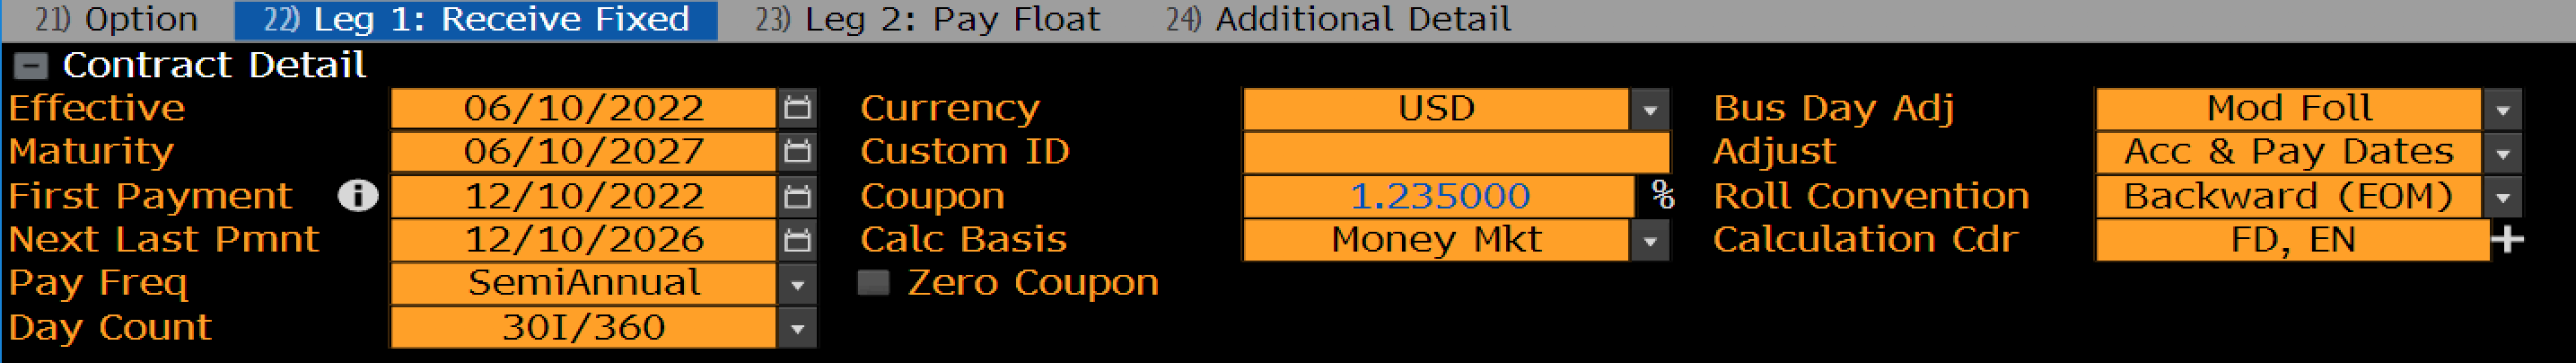

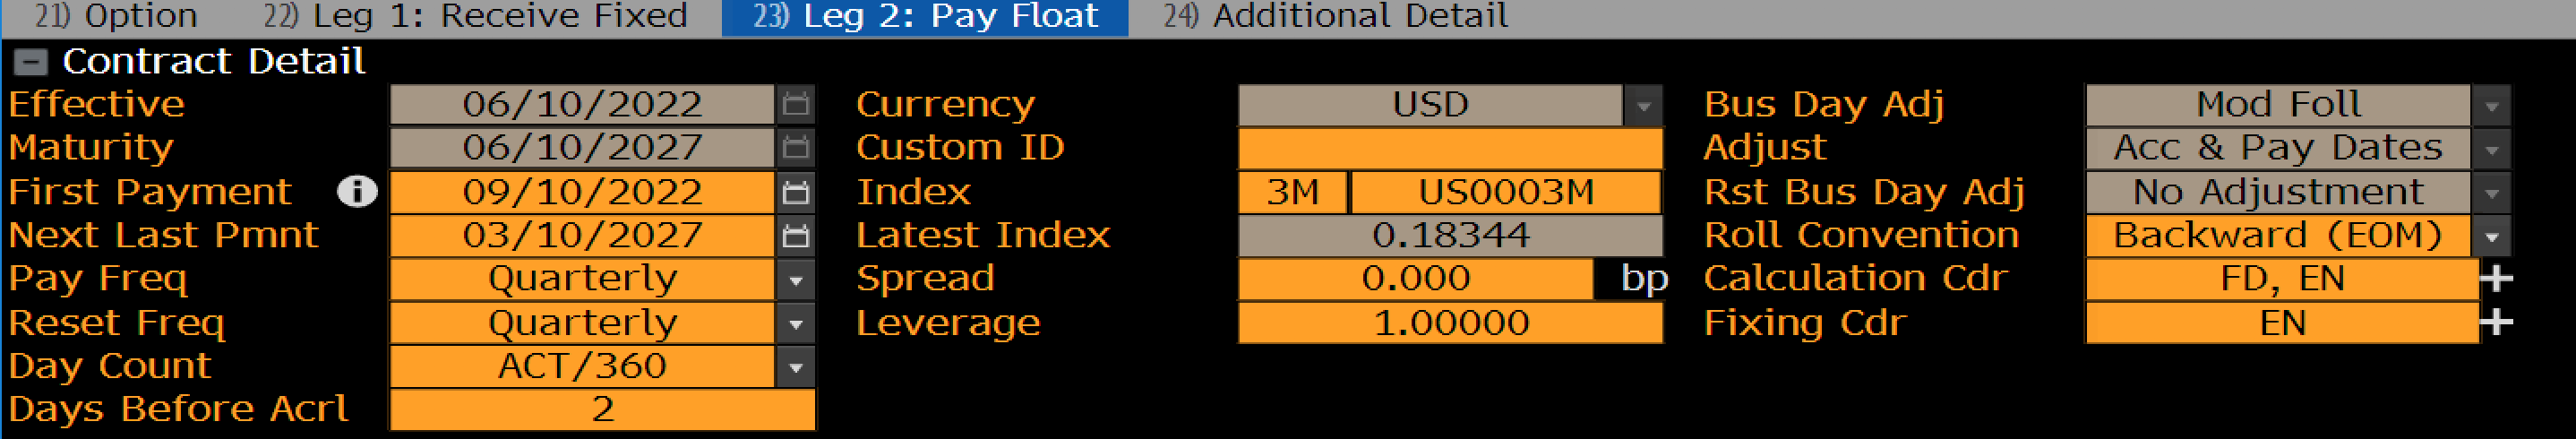

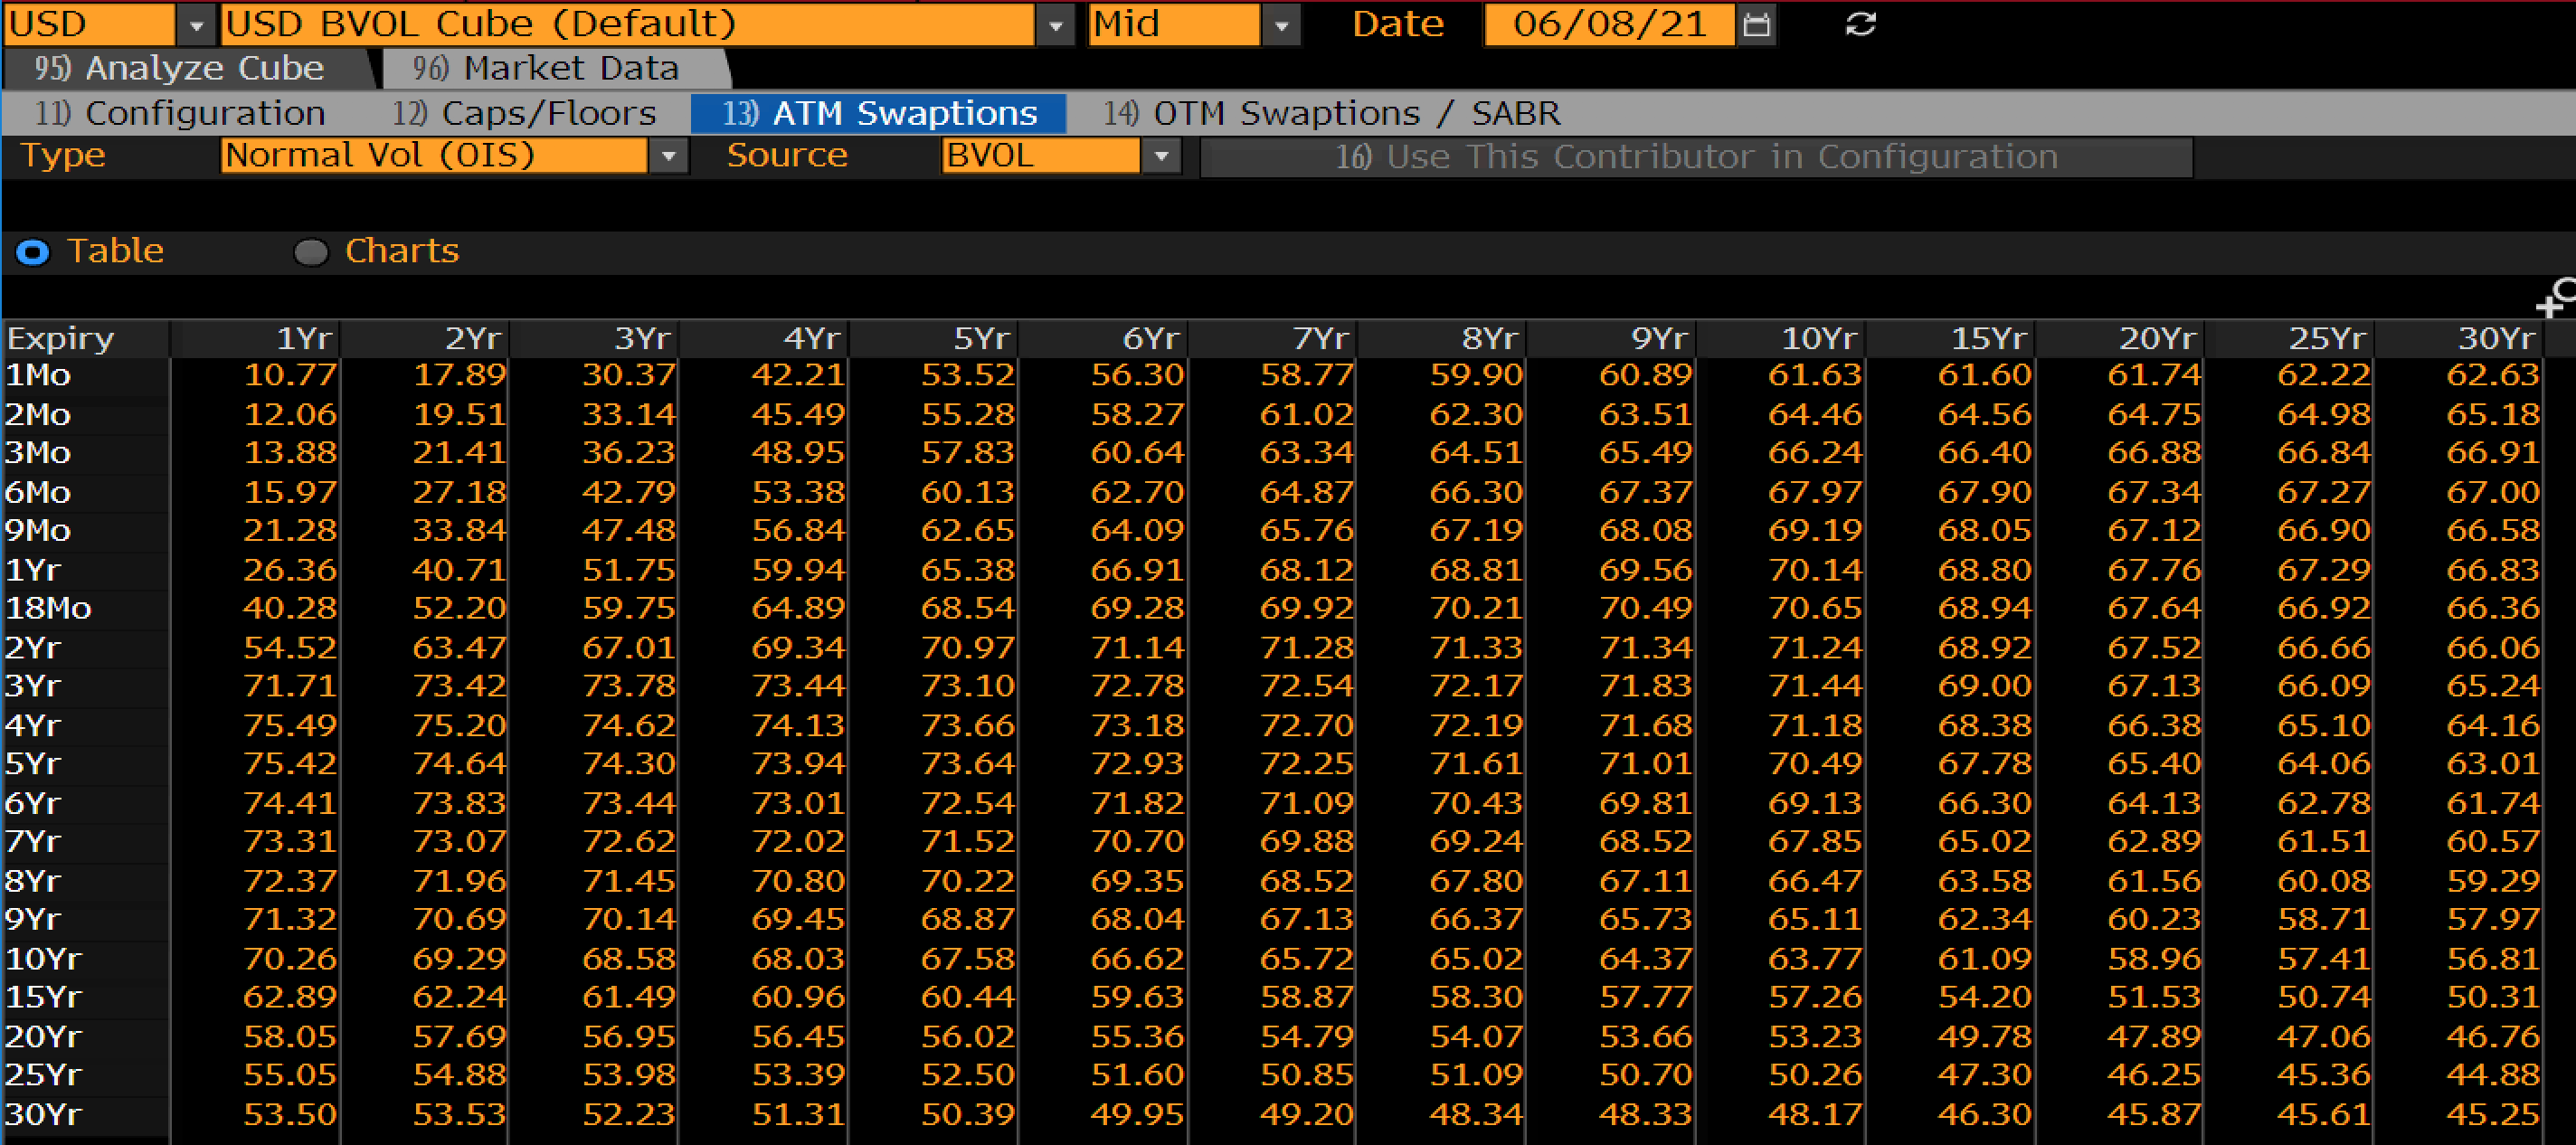

In [11]:
voldata

optionTenor swapTenor   value strike volType valuationDate currency
0            3M        5Y  0.2708  -0.02  Normal    2021-06-08      USD
1            3M       10Y  0.3549  -0.02  Normal    2021-06-08      USD
2            3M       30Y  0.3636  -0.02  Normal    2021-06-08      USD
3            6M        5Y  0.1595  -0.02  Normal    2021-06-08      USD
4            6M       10Y  0.2226  -0.02  Normal    2021-06-08      USD
..          ...       ...     ...    ...     ...           ...      ...
638         30Y        5Y  0.5039    ATM  Normal    2021-06-08      USD
639         30Y        6Y  0.4995    ATM  Normal    2021-06-08      USD
640         30Y        7Y  0.4920    ATM  Normal    2021-06-08      USD
641         30Y        8Y  0.4834    ATM  Normal    2021-06-08      USD
642         30Y        9Y  0.4833    ATM  Normal    2021-06-08      USD

[643 rows x 7 columns]

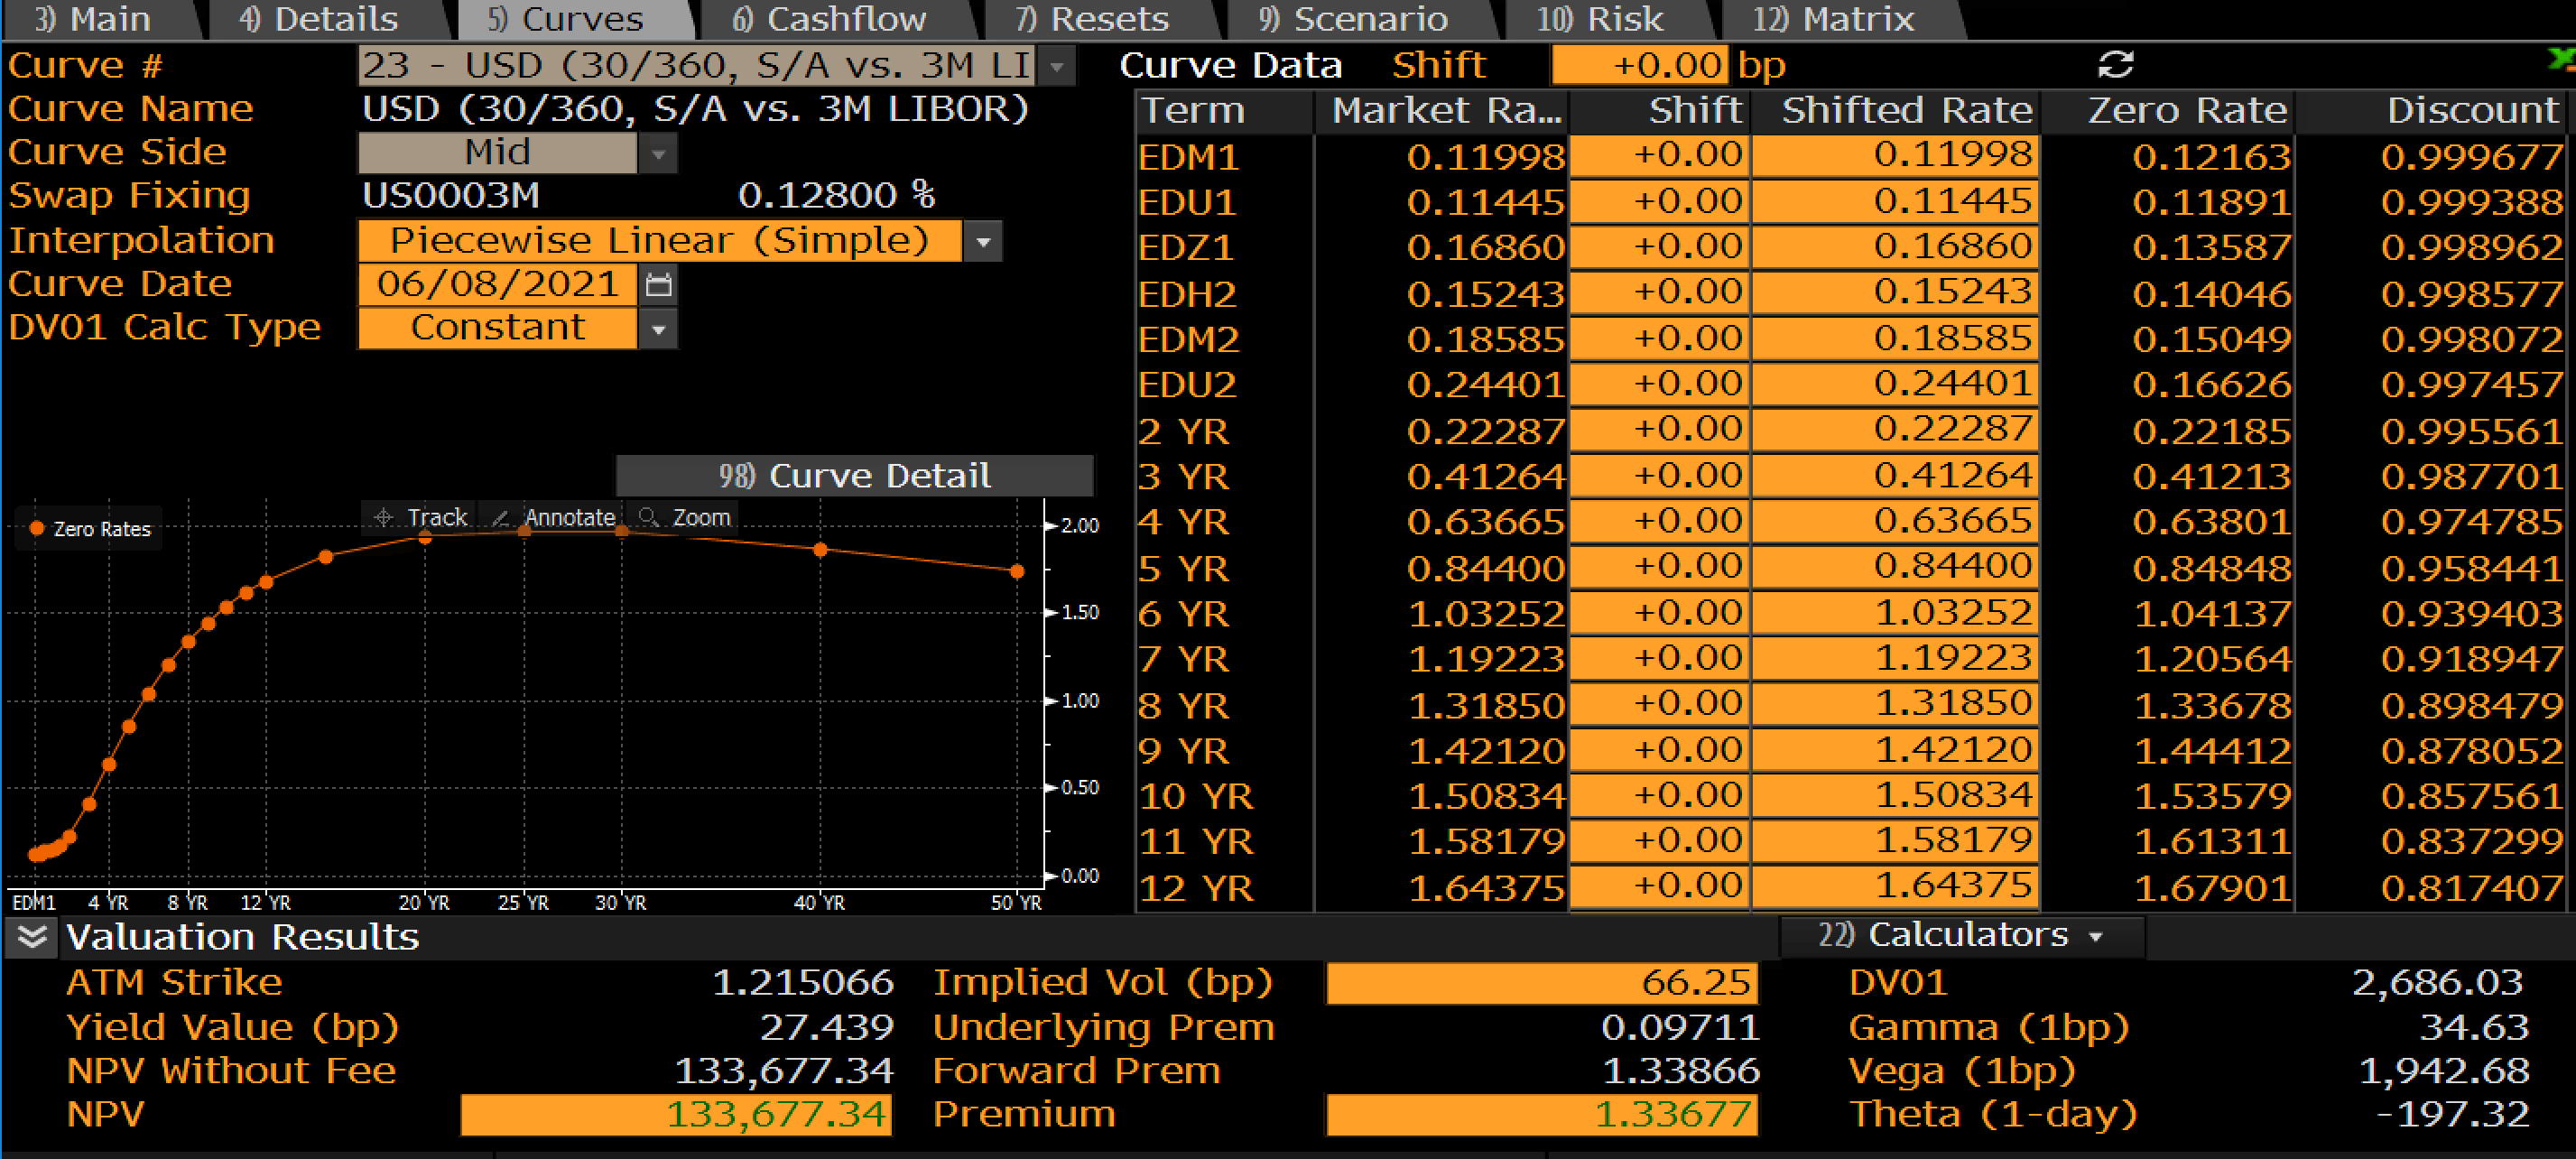

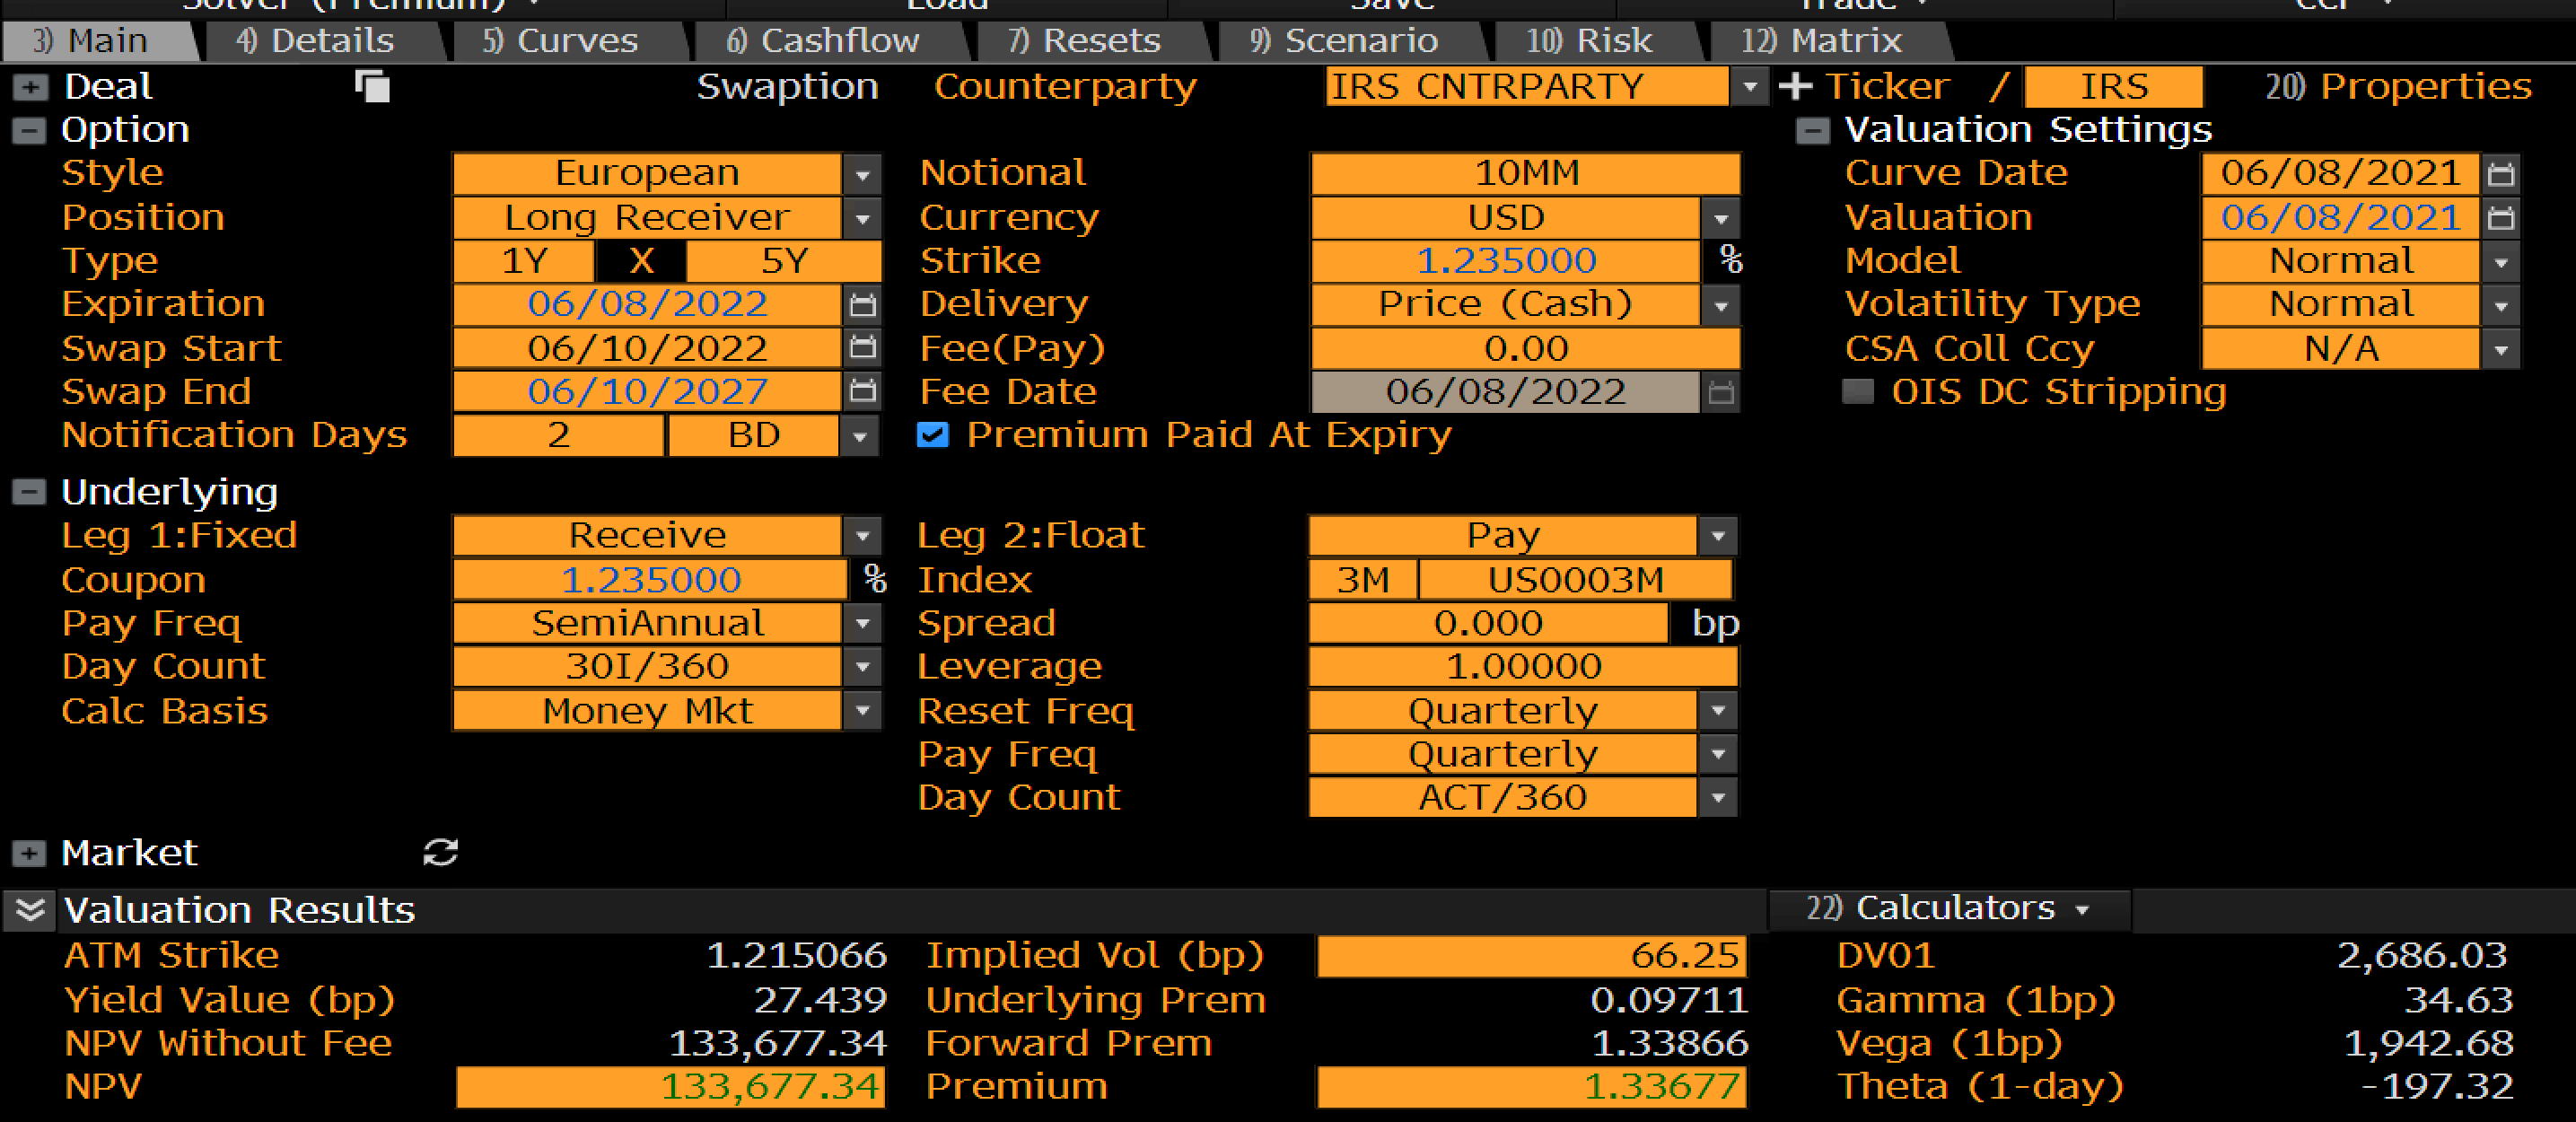

In [12]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['Swap PV', result.get('swapPv')])
npvTable.add_row(['Fixed Leg PV', result.get('fixedLegPv')])
npvTable.add_row(['Float Leg PV', result.get('floatingLegPv')])
npvTable.add_row(['PV01', result.get('PV01')])
npvTable.add_row(['DV01', result.get('DV01')])
npvTable.add_row(['Fair Rate', 100*result.get('fairRate')])
npvTable.add_row(['Fair Spread', 100*result.get('fairSpread')])
npvTable.add_row(['Implied Quote', 100*result.get('impliedQuote')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)




+---------------+--------------+
|    Parameters |        Value |
+---------------+--------------+
|            PV |  134674.6013 |
|       Swap PV |    8640.8757 |
|  Fixed Leg PV |  600290.0684 |
|  Float Leg PV | -591649.1927 |
|          PV01 |    4860.6483 |
|          DV01 |   -4938.8638 |
|     Fair Rate |       1.2172 |
|   Fair Spread |       0.0175 |
| Implied Quote |       1.2172 |
+---------------+--------------+


In [13]:
cashflow=pd.DataFrame(result.get('data'))

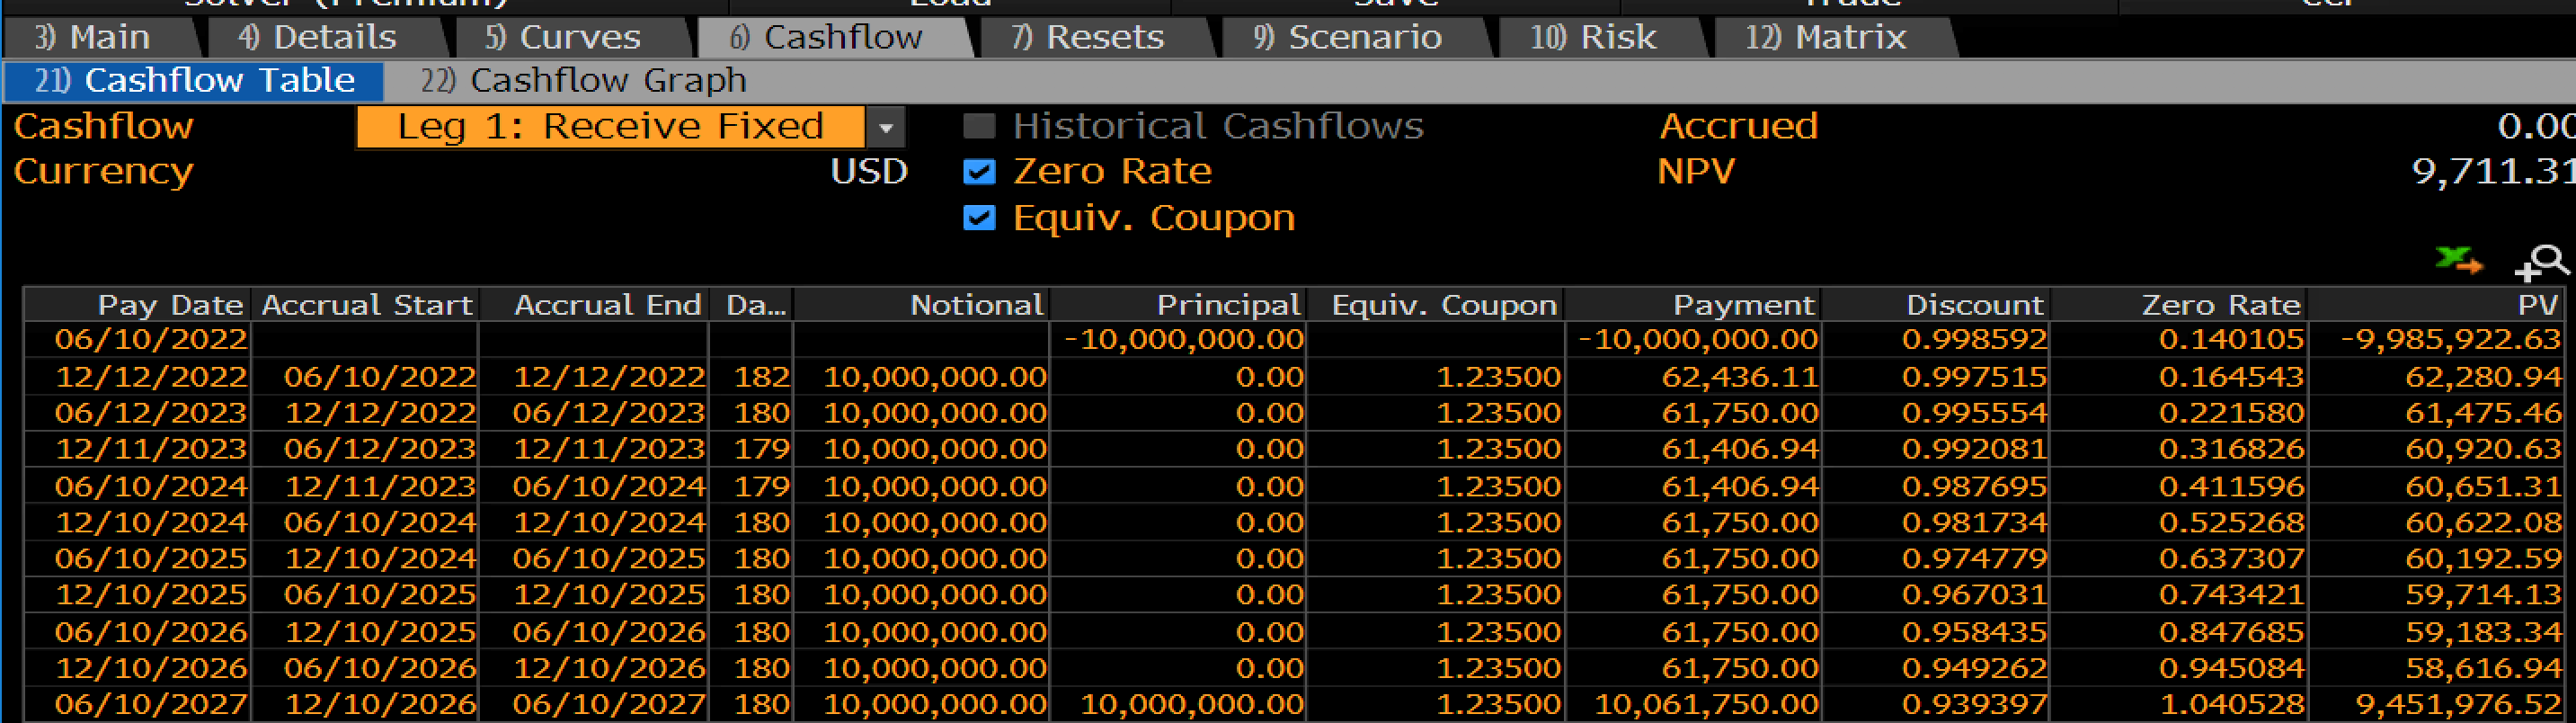

In [14]:
fixedleg=cashflow[cashflow['leg']=='Fixed']
fixedleg

fixingDate accrualStart  accrualEnd  notional currency    leg payOrReceive  \
0  2021-06-08   2022-06-14  2022-12-12  10000000      USD  Fixed      Receive   
1  2021-12-03   2022-12-12  2023-06-12  10000000      USD  Fixed      Receive   
2  2022-06-03   2023-06-12  2023-12-11  10000000      USD  Fixed      Receive   
3  2022-12-02   2023-12-11  2024-06-10  10000000      USD  Fixed      Receive   
4  2023-06-02   2024-06-10  2024-12-10  10000000      USD  Fixed      Receive   
5  2023-12-04   2024-12-10  2025-06-10  10000000      USD  Fixed      Receive   
6  2024-06-03   2025-06-10  2025-12-10  10000000      USD  Fixed      Receive   
7  2024-12-03   2025-12-10  2026-06-10  10000000      USD  Fixed      Receive   
8  2025-06-03   2026-06-10  2026-12-10  10000000      USD  Fixed      Receive   
9  2025-12-03   2026-12-10  2027-06-10  10000000      USD  Fixed      Receive   

           instrument     rate  zeroRate  spread  termToMatByDay  \
0  Interest Rate Swap  0.01235  0.001700       0             178   
1  Interest Rate Swap  0.01235  0.002229       0             358   
2  Interest Rate Swap  0.01235  0.003180       0             537   
3  Interest Rate Swap  0.01235  0.004132       0             716   
4  Interest Rate Swap  0.01235  0.005266       0             896   
5  Interest Rate Swap  0.01235  0.006390       0            1076   
6  Interest Rate Swap  0.01235  0.007447       0            1256   
7  Interest Rate Swap  0.01235  0.008494       0            1436   
8  Interest Rate Swap  0.01235  0.009463       0            1616   
9  Interest Rate Swap  0.01235  0.010422       0            1796   

   termToMatByYear      cashflow  discountFactor    cashflowPv  
0         0.494444  61063.888889        0.997444  60907.812040  
1         0.994444  61750.000000        0.995540  61474.616112  
2         1.491667  61406.944444        0.992073  60920.146569  
3         1.988889  61406.944444        0.987681  60650.477439  
4         2.488889  61750.000000        0.981738  60622.331630  
5         2.988889  61750.000000        0.974765  60191.767762  
6         3.488889  61750.000000        0.967045  59715.025310  
7         3.988889  61750.000000        0.958421  59182.520778  
8         4.488889  61750.000000        0.949286  58618.424977  
9         4.988889  61750.000000        0.939384  58006.945825

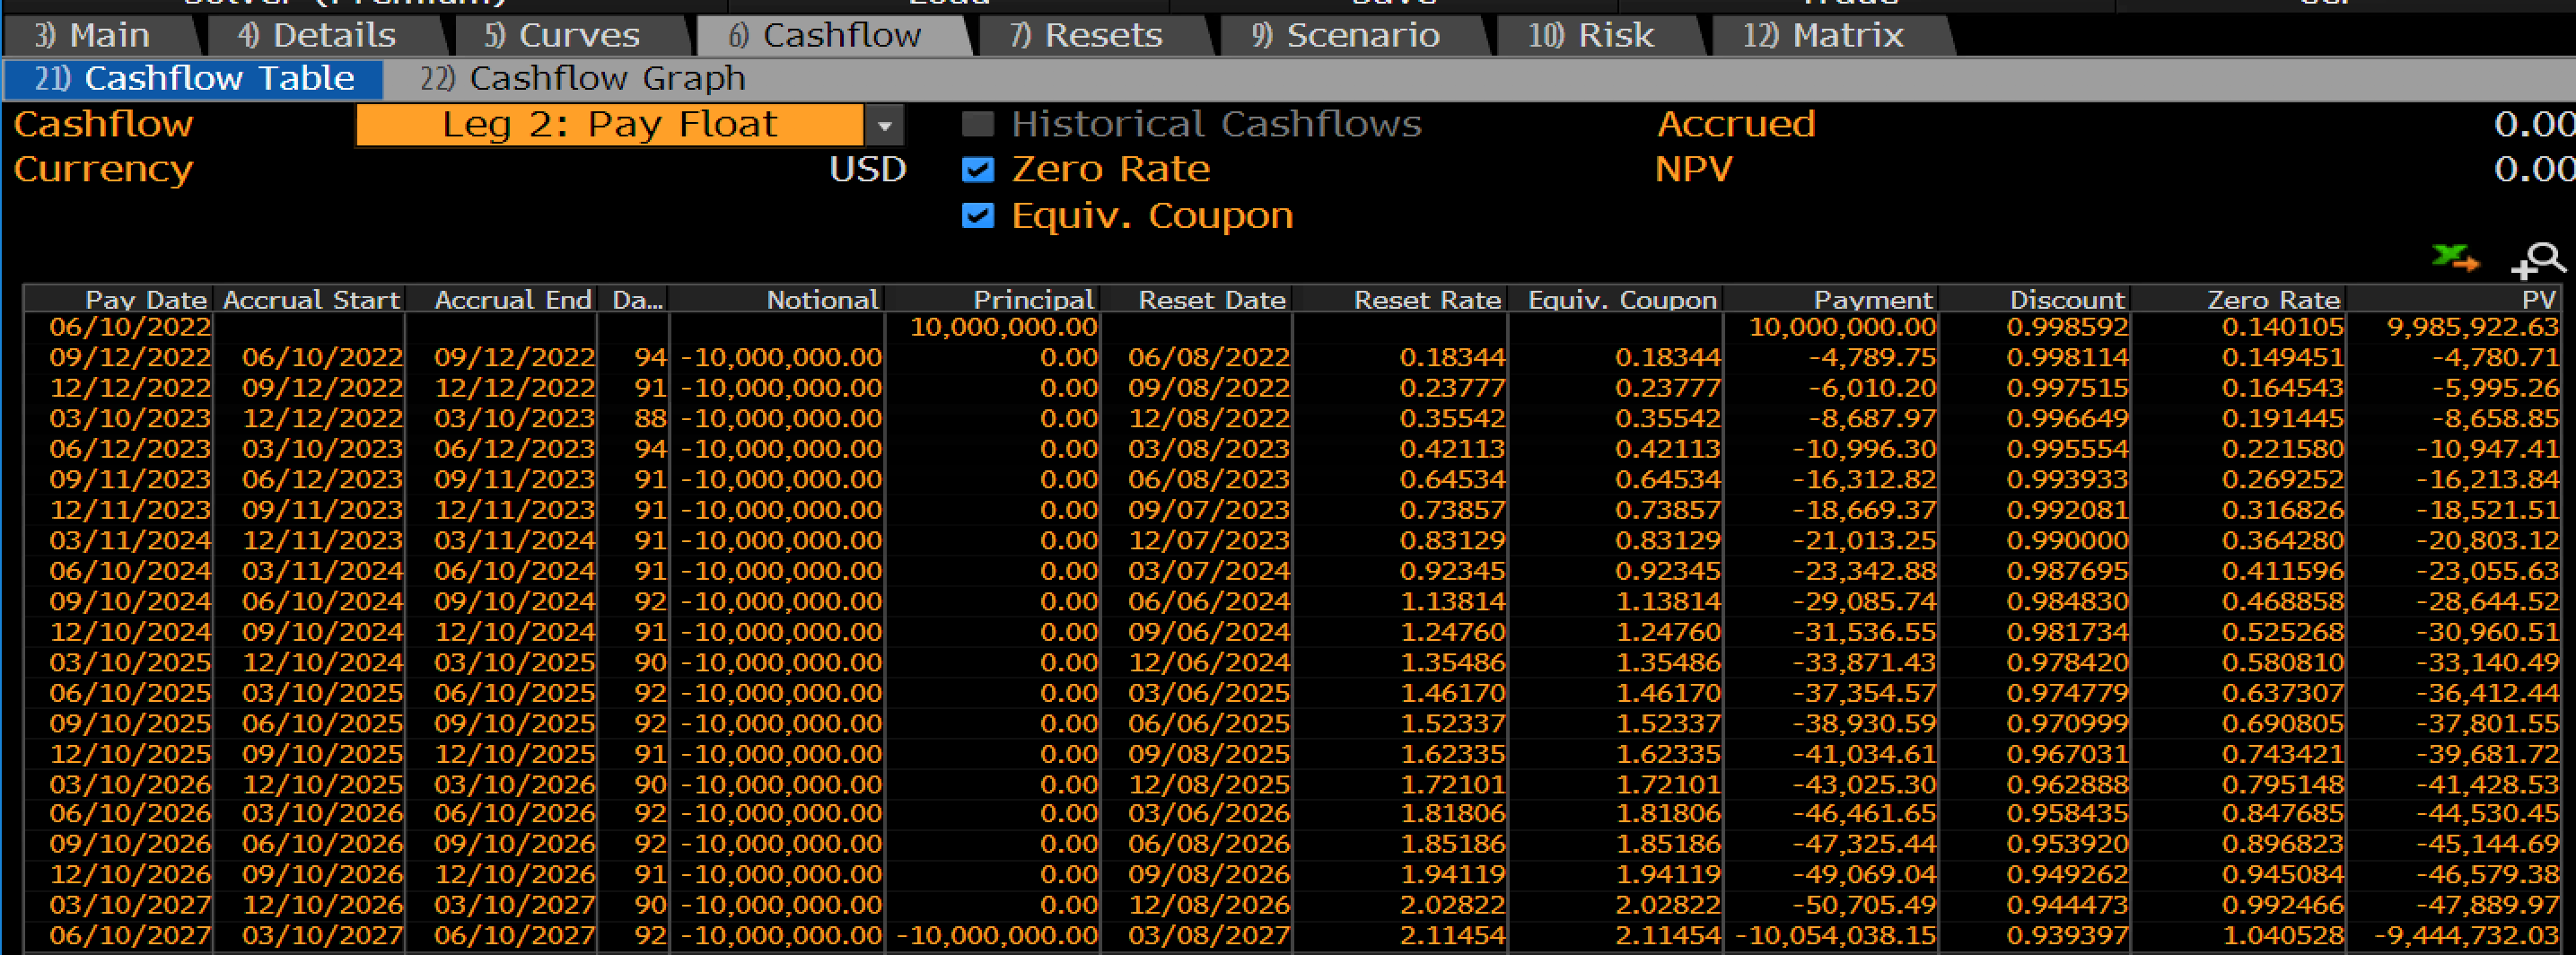

In [15]:
floatingleg=cashflow[cashflow['leg']=='Floating']
floatingleg

fixingDate accrualStart  accrualEnd  notional currency       leg  \
10  2021-06-08   2022-06-14  2022-09-12  10000000      USD  Floating   
11  2021-09-02   2022-09-12  2022-12-12  10000000      USD  Floating   
12  2021-12-03   2022-12-12  2023-03-10  10000000      USD  Floating   
13  2022-03-03   2023-03-10  2023-06-12  10000000      USD  Floating   
14  2022-06-03   2023-06-12  2023-09-11  10000000      USD  Floating   
15  2022-09-01   2023-09-11  2023-12-11  10000000      USD  Floating   
16  2022-12-02   2023-12-11  2024-03-11  10000000      USD  Floating   
17  2023-03-03   2024-03-11  2024-06-10  10000000      USD  Floating   
18  2023-06-02   2024-06-10  2024-09-10  10000000      USD  Floating   
19  2023-09-01   2024-09-10  2024-12-10  10000000      USD  Floating   
20  2023-12-04   2024-12-10  2025-03-10  10000000      USD  Floating   
21  2024-03-01   2025-03-10  2025-06-10  10000000      USD  Floating   
22  2024-06-03   2025-06-10  2025-09-10  10000000      USD  Floating   
23  2024-09-03   2025-09-10  2025-12-10  10000000      USD  Floating   
24  2024-12-03   2025-12-10  2026-03-10  10000000      USD  Floating   
25  2025-03-03   2026-03-10  2026-06-10  10000000      USD  Floating   
26  2025-06-03   2026-06-10  2026-09-10  10000000      USD  Floating   
27  2025-09-03   2026-09-10  2026-12-10  10000000      USD  Floating   
28  2025-12-03   2026-12-10  2027-03-10  10000000      USD  Floating   
29  2026-03-03   2027-03-10  2027-06-10  10000000      USD  Floating   

   payOrReceive          instrument      rate  zeroRate  spread  \
10          Pay  Interest Rate Swap  0.001918  0.001515       0   
11          Pay  Interest Rate Swap  0.002483  0.001675       0   
12          Pay  Interest Rate Swap  0.003471  0.001923       0   
13          Pay  Interest Rate Swap  0.004070  0.002198       0   
14          Pay  Interest Rate Swap  0.006439  0.002667       0   
15          Pay  Interest Rate Swap  0.007377  0.003135       0   
16          Pay  Interest Rate Swap  0.008316  0.003603       0   
17          Pay  Interest Rate Swap  0.009254  0.004071       0   
18          Pay  Interest Rate Swap  0.011334  0.004633       0   
19          Pay  Interest Rate Swap  0.012453  0.005188       0   
20          Pay  Interest Rate Swap  0.013561  0.005737       0   
21          Pay  Interest Rate Swap  0.014675  0.006298       0   
22          Pay  Interest Rate Swap  0.015155  0.006821       0   
23          Pay  Interest Rate Swap  0.016199  0.007338       0   
24          Pay  Interest Rate Swap  0.017232  0.007850       0   
25          Pay  Interest Rate Swap  0.018272  0.008373       0   
26          Pay  Interest Rate Swap  0.018409  0.008852       0   
27          Pay  Interest Rate Swap  0.019367  0.009326       0   
28          Pay  Interest Rate Swap  0.020314  0.009795       0   
29          Pay  Interest Rate Swap  0.021269  0.010274       0   

    termToMatByDay  termToMatByYear      cashflow  discountFactor  \
10              90         0.250000   4795.771593        0.998070   
11             181         0.502778   6275.696495        0.997444   
12             269         0.747222   8485.543453        0.996598   
13             363         1.008333  10627.699468        0.995540   
14             454         1.261111  16276.226123        0.993923   
15             545         1.513889  18648.015772        0.992073   
16             636         1.766667  21020.367047        0.989992   
17             727         2.019444  23393.280078        0.987681   
18             819         2.275000  28964.417009        0.984829   
19             910         2.527778  31479.077035        0.981738   
20            1000         2.777778  33901.546701        0.978421   
21            1092         3.033333  37503.330285        0.974765   
22            1184         3.288889  38729.730711        0.971005   
23            1275         3.541667  40947.942887        0.967045   
24            1365         3.791667  43080.05793